In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

# Answer 1

In [2]:
DT = pd.read_csv("delivery_time.csv")
DT

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
DT.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [5]:
DT.rename(columns = {'Delivery Time':'Del_Time', 'Sorting Time':'Sort_Time'}, inplace = True)
DT

,Del_Time,Sort_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\Kishor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Del_Time', ylabel='Density'>

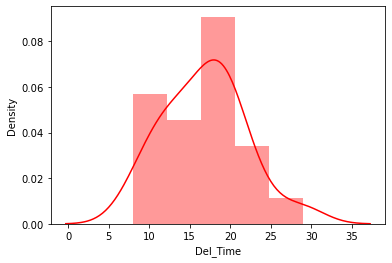

In [23]:
sns.distplot(DT['Del_Time'],color='red')

## Since Delivery Time column is skewed a little

In [35]:
DT['Log_Del'] =  np.log10(DT['Del_Time'])
DT

,Del_Time,Sort_Time,Log_Del
0,21.00,10,1.322219
1,13.50,4,1.130334
2,19.75,6,1.295567
3,24.00,9,1.380211
4,29.00,10,1.462398
5,15.35,6,1.186108
6,19.00,7,1.278754
7,9.50,3,0.977724
8,17.90,10,1.252853
9,18.75,9,1.273001


In [83]:
DT['Sqrt_Del'] =  np.sqrt(DT['Del_Time'])
DT

,Del_Time,Sort_Time,Log_Del,Log_Sort,Sqrt_Del
0,21.00,10,1.322219,1.000000,4.582576
1,13.50,4,1.130334,0.602060,3.674235
2,19.75,6,1.295567,0.778151,4.444097
3,24.00,9,1.380211,0.954243,4.898979
4,29.00,10,1.462398,1.000000,5.385165
5,15.35,6,1.186108,0.778151,3.917908
6,19.00,7,1.278754,0.845098,4.358899
7,9.50,3,0.977724,0.477121,3.082207
8,17.90,10,1.252853,1.000000,4.230839
9,18.75,9,1.273001,0.954243,4.330127


array([[<AxesSubplot:title={'center':'Sqrt_Del'}>]], dtype=object)

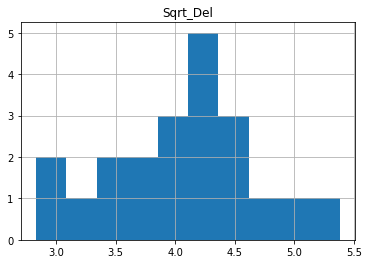

In [80]:
DT.hist(column='Sqrt_Del',bins = 10)

C:\Users\Kishor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sqrt_Del', ylabel='Density'>

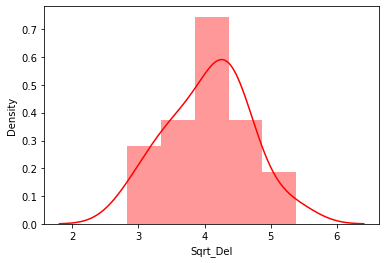

In [84]:
sns.distplot(DT['Sqrt_Del'],color='red')

C:\Users\Kishor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sort_Time', ylabel='Density'>

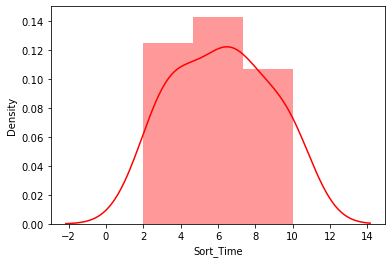

In [38]:
sns.distplot(DT['Sort_Time'],color='red')

In [98]:
DT = DT.drop(columns=['Log_Del'])
DT

,Del_Time,Sort_Time,Sqrt_Del
0,21.00,10,4.582576
1,13.50,4,3.674235
2,19.75,6,4.444097
3,24.00,9,4.898979
4,29.00,10,5.385165
5,15.35,6,3.917908
6,19.00,7,4.358899
7,9.50,3,3.082207
8,17.90,10,4.230839
9,18.75,9,4.330127


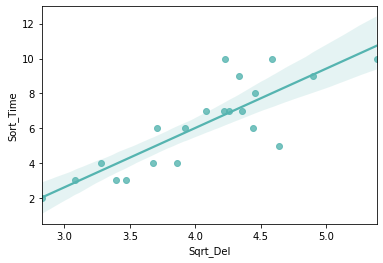

In [85]:
sns.regplot(x="Sqrt_Del", y="Sort_Time", data=DT,color='#55B4B0');

In [86]:
model = smf.ols('Sqrt_Del ~ Sort_Time',data=DT).fit()
model.params

Intercept    2.772731
Sort_Time    0.206632
dtype: float64

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Sqrt_Del   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           2.00e-06
Time:                        00:26:09   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
Sort_Time      0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
New_S = pd.Series([9,6,4,5,10])
New_S

0     9
1     6
2     4
3     5
4    10
dtype: int64

In [89]:
New_SortTime = pd.DataFrame(New_S,columns = ["Sort_Time"])
New_SortTime

,Sort_Time
0,9
1,6
2,4
3,5
4,10


In [90]:
New_D = model.predict(New_SortTime).round()
New_D

0    5.0
1    4.0
2    4.0
3    4.0
4    5.0
dtype: float64

In [93]:
New_DelTime = pd.DataFrame(New_D*New_D,columns = ["Del_Time"])
New_DelTime

,Del_Time
0,25.0
1,16.0
2,16.0
3,16.0
4,25.0


### Predicted Value

In [94]:
New_Results =New_SortTime.join(New_DelTime)
New_Results

,Sort_Time,Del_Time
0,9,25.0
1,6,16.0
2,4,16.0
3,5,16.0
4,10,25.0


# Answer 2

In [14]:
Sal = pd.read_csv("Salary_Data.csv")
Sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


C:\Users\Kishor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

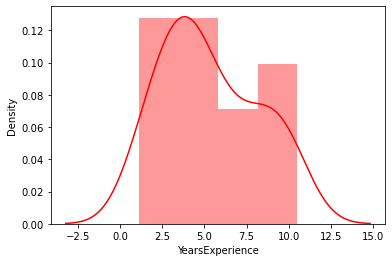

In [24]:
sns.distplot(Sal['YearsExperience'],color='red')

C:\Users\Kishor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

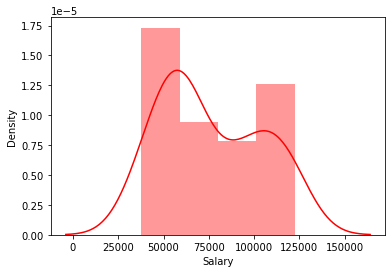

In [25]:
sns.distplot(Sal['Salary'],color='red')

<AxesSubplot:>

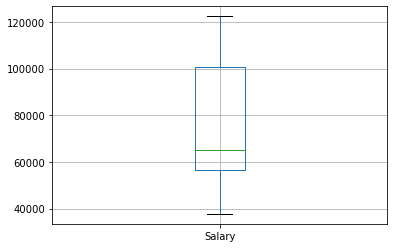

In [32]:
Sal.boxplot(column = 'Salary')

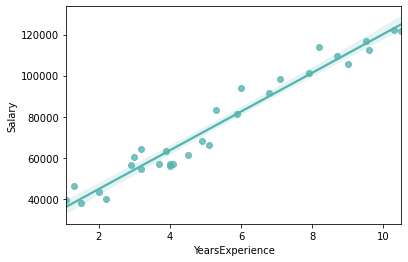

In [15]:
sns.regplot(x="YearsExperience", y="Salary", data=Sal,color='#55B4B0');

In [16]:
Sal_model = smf.ols('Salary ~ YearsExperience',data=Sal).fit()
Sal_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
Sal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        15:03:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
New_E = pd.Series([15.2,9,12.5,30.7,20.1])
New_E

0    15.2
1     9.0
2    12.5
3    30.7
4    20.1
dtype: float64

In [19]:
New_Exp = pd.DataFrame(New_E,columns = ["YearsExperience"])
New_Exp

,YearsExperience
0,15.2
1,9.0
2,12.5
3,30.7
4,20.1


In [20]:
New_Sa = Sal_model.predict(New_Exp).round()
New_Sa.round()

0    169432.0
1    110842.0
2    143917.0
3    315906.0
4    215736.0
dtype: float64

In [21]:
New_Sal =  pd.DataFrame(New_Sa, columns = ["Salary"])
New_Sal

,Salary
0,169432.0
1,110842.0
2,143917.0
3,315906.0
4,215736.0


## Predicted Salary

In [22]:
Sal_Result = New_Exp.join(New_Sal)
Sal_Result

,YearsExperience,Salary
0,15.2,169432.0
1,9.0,110842.0
2,12.5,143917.0
3,30.7,315906.0
4,20.1,215736.0
